In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Initializing datasets

Data from http://www.electproject.org/national-1789-present

In [2]:
data = pd.read_csv(r'VoterTurnout.csv')

In [3]:
data.head()

,Year,Presidential,Midterm,Previous Presidential,Previous Midterm
0,1792,6.3,25.0,11.6,21.6
1,1796,20.1,36.0,6.3,25.0
2,1800,32.3,42.0,20.1,36.0
3,1804,23.8,45.8,32.3,42.0
4,1808,36.8,49.8,23.8,45.8


In [4]:
data.tail()

,Year,Presidential,Midterm,Previous Presidential,Previous Midterm
52,2000,54.2,39.5,51.7,38.1
53,2004,60.1,40.4,54.2,39.5
54,2008,61.6,41.0,60.1,40.4
55,2012,58.6,36.7,61.6,41.0
56,2016,60.1,50.0,58.6,36.7


In [5]:
data = data[data['Year'] >= 1952]
print(data['Year'].min())
print(data['Year'].max())

1952
2016


In [6]:
x = data[['Previous Presidential', 'Midterm']]
y = data['Presidential']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.65, random_state=0)

# Fit regression using decision tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [9]:
model.score(x_train, y_train)

1.0

#### Score of 0.74 on test data

In [10]:
model.score(x_test, y_test)

-0.021132148968433073

# Visualization

[Text(0.5, 0.875, 'Midterm <= 41.5\nsquared_error = 11.242\nsamples = 5\nvalue = 58.82'),
 Text(0.25, 0.625, 'Midterm <= 37.9\nsquared_error = 3.236\nsamples = 3\nvalue = 56.333'),
 Text(0.125, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 58.6'),
 Text(0.375, 0.375, 'Previous Presidential <= 57.1\nsquared_error = 1.0\nsamples = 2\nvalue = 55.2'),
 Text(0.25, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 54.2'),
 Text(0.5, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 56.2'),
 Text(0.75, 0.625, 'Previous Presidential <= 58.0\nsquared_error = 0.062\nsamples = 2\nvalue = 62.55'),
 Text(0.625, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 62.3'),
 Text(0.875, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 62.8')]

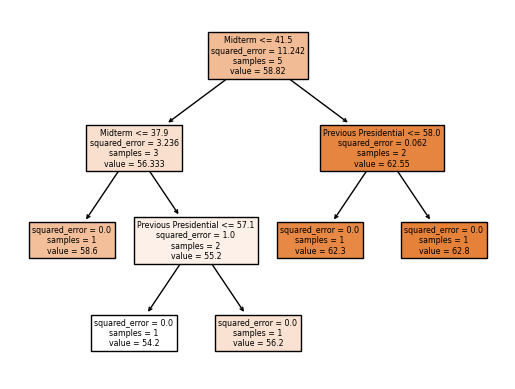

In [11]:
from sklearn import tree
tree.plot_tree(model, filled=True, feature_names=x.columns)

In [12]:
def predict(previous_presidential, previous_midterm):
    array = np.array([[previous_presidential, previous_midterm]])
    array.reshape(-1, 1)
    return model.predict(array)[0]

Prediction of 2020 presidential election voter turnout is 62.5% given the turnout of 2016 (60.1%) and 2018 (50%)

In [13]:
predict(60.1, 50)

C:\Users\jerry\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


62.8

In [14]:
prev_pres = data['Previous Presidential']
prev_mid = data['Previous Midterm']

In [15]:
# Prepping to initialize axes
start = data['Year'][0]
num = len(x)
step = 4

# Initialize axes
x_axis = np.arange(0, num) * step + start
prediction = [predict(prev_pres[i], prev_mid[i]) for i in range(len(x_axis))]
actual = [data['Presidential'][i] for i in range(len(x_axis))]

# Plot lines
plt.plot(x_axis, prediction, label='prediction')
plt.plot(x_axis, actual, label='actual')

# Label axes and show line labels as well
plt.xlabel('Year')
plt.ylabel('Voter turnout %')
plt.legend()

# Show graph
plt.show()

KeyError: 0